In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv(r"C:\Users\amanz\Downloads\credit.csv")#reading the file 

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
df.isnull().sum()#checking null values 

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
df.nunique()# checking unique values

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [9]:
def check_underscores_in_data(df):
    columns_with_underscores = []  # List to store columns with underscores in their data
    for col in df.columns:
        # Check if any value in the column contains an underscore
        if df[col].apply(lambda x: '_' in str(x)).any():
            columns_with_underscores.append(col)
    
    # Print results
    if columns_with_underscores:
        print("Columns with data containing underscores:")
        for col in columns_with_underscores:
            print(f"- {col}")
    else:
        print("No data with underscores found in any column.")

check_underscores_in_data(df)

Columns with data containing underscores:
- Occupation
- Payment_Behaviour


In [10]:
occupation_counts = df['Occupation'].value_counts()

print("Occupation Name : Count")
for occupation, count in occupation_counts.items():
    print(f"{occupation} : {count}")



Occupation Name : Count
Lawyer : 7096
Engineer : 6864
Architect : 6824
Mechanic : 6776
Scientist : 6744
Accountant : 6744
Developer : 6720
Media_Manager : 6720
Teacher : 6672
Entrepreneur : 6648
Doctor : 6568
Journalist : 6536
Manager : 6432
Musician : 6352
Writer : 6304


In [11]:
# Replace underscore with space in the 'Occupation' column
df['Occupation'] = df['Occupation'].str.replace('_', ' ')

# Recalculate the counts of unique occupations
occupation_counts = df['Occupation'].value_counts()

# Print the updated counts
print("Occupation Name : Count")
for occupation, count in occupation_counts.items():
    print(f"{occupation} : {count}")


Occupation Name : Count
Lawyer : 7096
Engineer : 6864
Architect : 6824
Mechanic : 6776
Scientist : 6744
Accountant : 6744
Developer : 6720
Media Manager : 6720
Teacher : 6672
Entrepreneur : 6648
Doctor : 6568
Journalist : 6536
Manager : 6432
Musician : 6352
Writer : 6304


In [12]:
credit_mix = {"Good": 0, "Standard": 1, "Bad": 2}#changing credit mix values 
df["Credit_Mix"].replace(credit_mix, inplace=True)
df["Credit_Mix"]

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Credit_Mix, Length: 100000, dtype: int64

In [13]:
payment_behaviour_counts = df['Payment_Behaviour'].value_counts()

print("Payment_Behaviour  : Count")
for payment_behaviour_counts, count in payment_behaviour_counts.items():
    print(f"{payment_behaviour_counts} : {count}")

Payment_Behaviour  : Count
Low_spent_Small_value_payments : 28616
High_spent_Medium_value_payments : 19738
High_spent_Large_value_payments : 14726
Low_spent_Medium_value_payments : 14399
High_spent_Small_value_payments : 11764
Low_spent_Large_value_payments : 10757


In [14]:
payment_behavior_dict = {
    'High_spent_Small_value_payments': 0,
    'Low_spent_Small_value_payments': 1,
    'High_spent_Large_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'Low_spent_Medium_value_payments': 5
}

df["Payment_Behaviour"].replace(payment_behavior_dict,inplace=True)# replacing payment behaviour values
df["Payment_Behaviour"]

0        0
1        3
2        5
3        1
4        4
        ..
99995    2
99996    4
99997    2
99998    3
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64

In [15]:
credit_score = {"Good":0,"Standard":1,"Poor":2}# credit score values replacing 
df["Credit_Score"].replace(credit_score,inplace=True)
df['Credit_Score']

0        0
1        0
2        0
3        0
4        0
        ..
99995    2
99996    2
99997    2
99998    1
99999    2
Name: Credit_Score, Length: 100000, dtype: int64

In [16]:
bins = [df['Annual_Income'].quantile(0), df['Annual_Income'].quantile(0.2), df['Annual_Income'].quantile(0.4),
        df['Annual_Income'].quantile(0.6), df['Annual_Income'].quantile(0.8), df['Annual_Income'].quantile(1)]

labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['Salary_Range'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels)

df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Salary_Range
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,26.822620,265.0,No,49.574949,21.465380,0,312.494089,0,Low
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.944960,266.0,No,49.574949,21.465380,3,284.629162,0,Low
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,28.609352,267.0,No,49.574949,21.465380,5,331.209863,0,Low
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.377862,268.0,No,49.574949,21.465380,1,223.451310,0,Low
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,24.797347,269.0,No,49.574949,21.465380,4,341.489231,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,502.38,34.663572,378.0,No,35.104023,24.028477,2,479.866228,2,Medium
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,502.38,40.565631,379.0,No,35.104023,24.028477,4,496.651610,2,Medium
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,502.38,41.255522,380.0,No,35.104023,24.028477,2,516.809083,2,Medium
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,502.38,33.638208,381.0,No,35.104023,24.028477,3,319.164979,1,Medium


In [17]:
df['Salary_Range']

0           Low
1           Low
2           Low
3           Low
4           Low
          ...  
99995    Medium
99996    Medium
99997    Medium
99998    Medium
99999    Medium
Name: Salary_Range, Length: 100000, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [18]:
salary_range_dict = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df["Salary_Range"].replace(salary_range_dict,inplace=True)

Visualizations 

In [19]:
#credit score visualizations

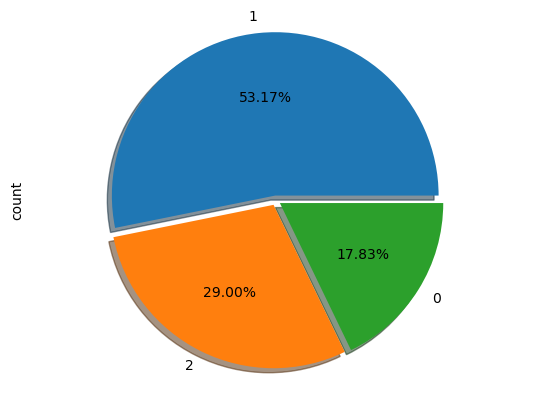

In [20]:
# Count the unique values
counts = df["Credit_Score"].value_counts()

# Prepare 'explode' based on the unique values present; adjust the 0.03 as necessary
explode = [0.03] * len(counts)

# Plotting 
counts.plot.pie(explode=explode, autopct="%1.2f%%", shadow=True, labels=counts.index)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [21]:
#Credit Score Distribution by Salary Range

Credit_Score     0      1     2
Salary_Range                   
0             1766   9972  8254
1             3085  11147  5768
2             4228  10179  5593
3             2659  10808  6533
4             6090  11068  2842


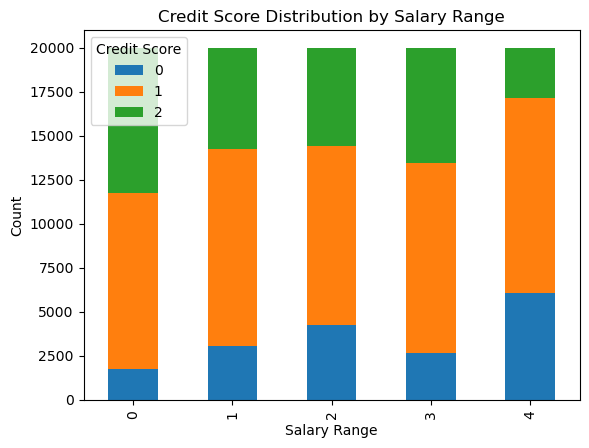

In [22]:
pivot_table = pd.pivot_table(df, values='Annual_Income', index='Salary_Range', columns='Credit_Score', aggfunc='count', fill_value=0)

print(pivot_table)
#Plot a bar graph
pivot_table.plot(kind='bar', stacked=True)
plt.title('Credit Score Distribution by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

In [23]:
#Feature Analysis
#Categorical variable - Occupation

In [24]:
### Value counts of the column - Occupation

occupation_count = df['Occupation'].value_counts(dropna = False)
occupation_count

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

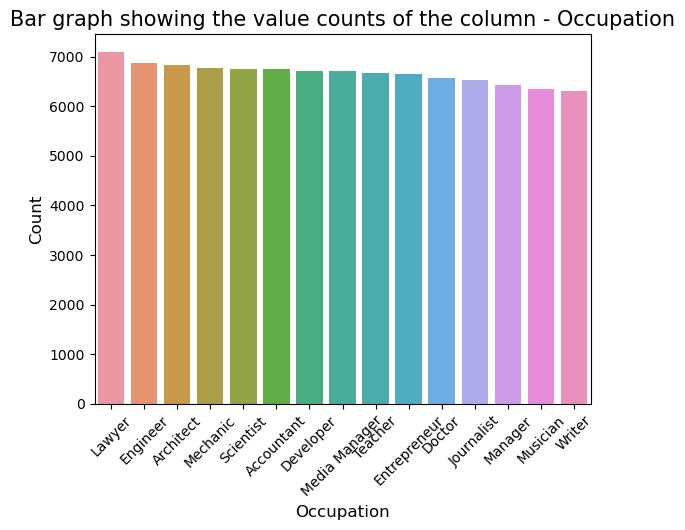

In [25]:
# Creating the bar plot
sns.barplot(x=occupation_count.index, y=occupation_count.values)

# Adding the title and labels with specified font sizes
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


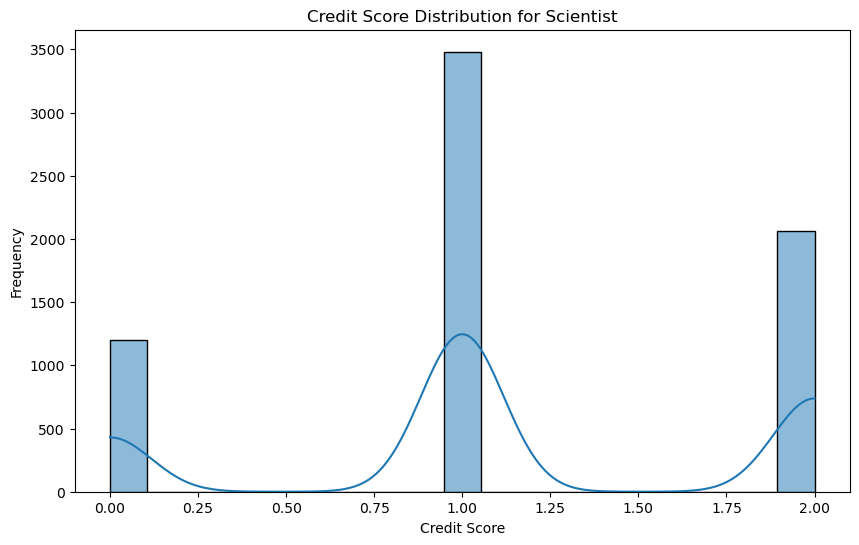

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


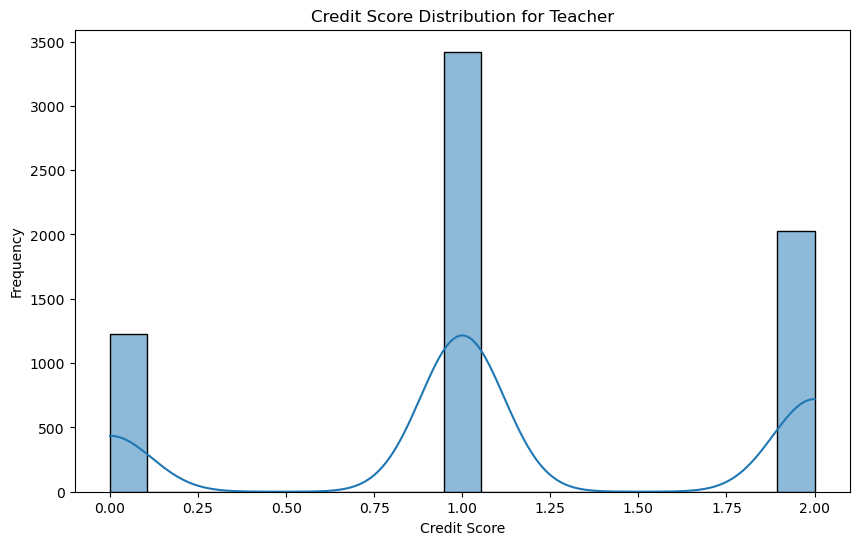

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


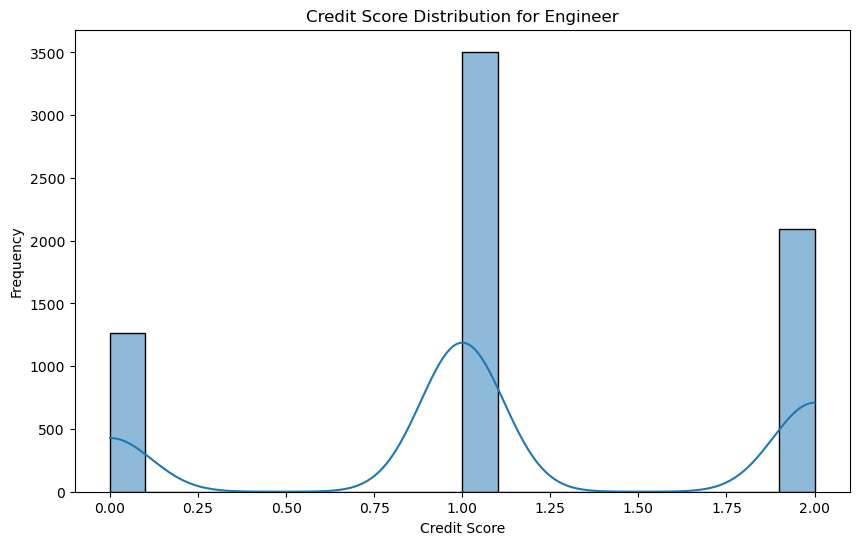

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


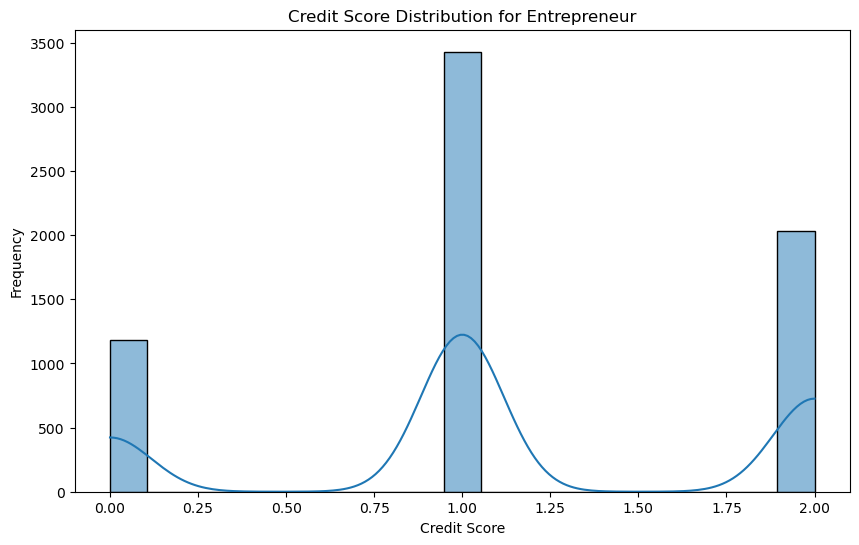

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


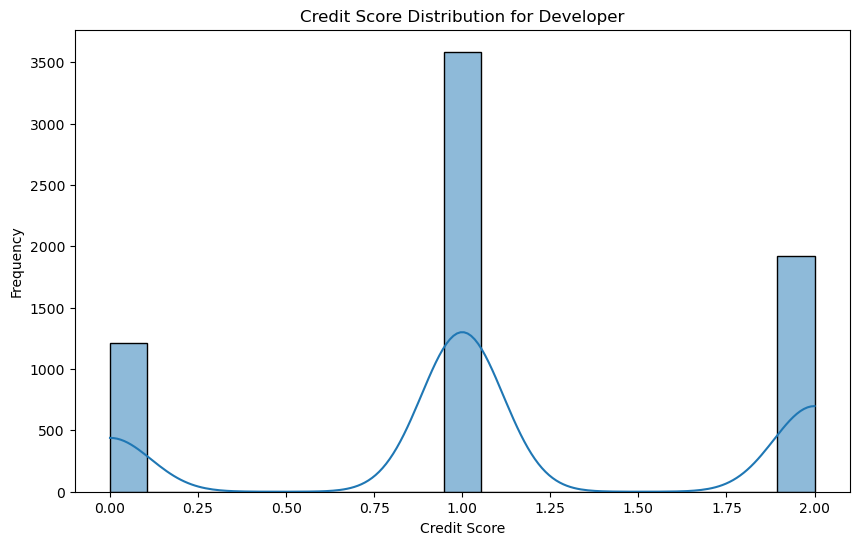

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


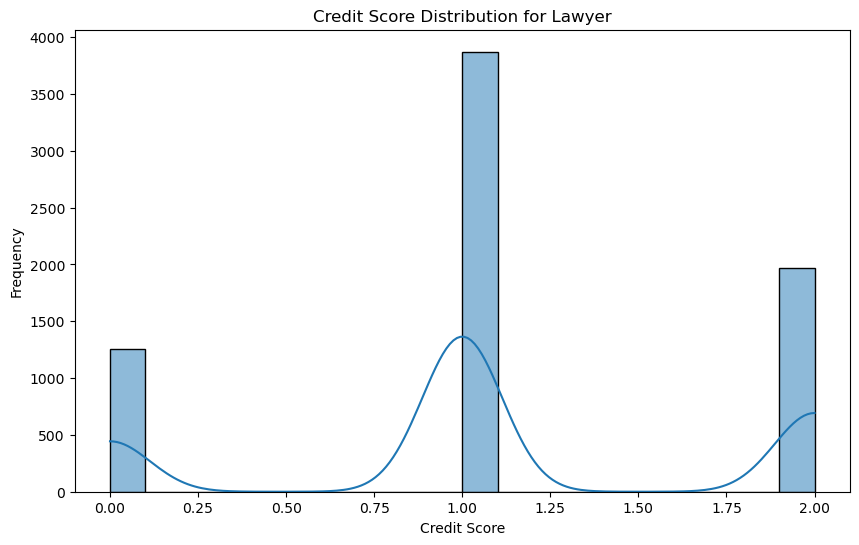

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


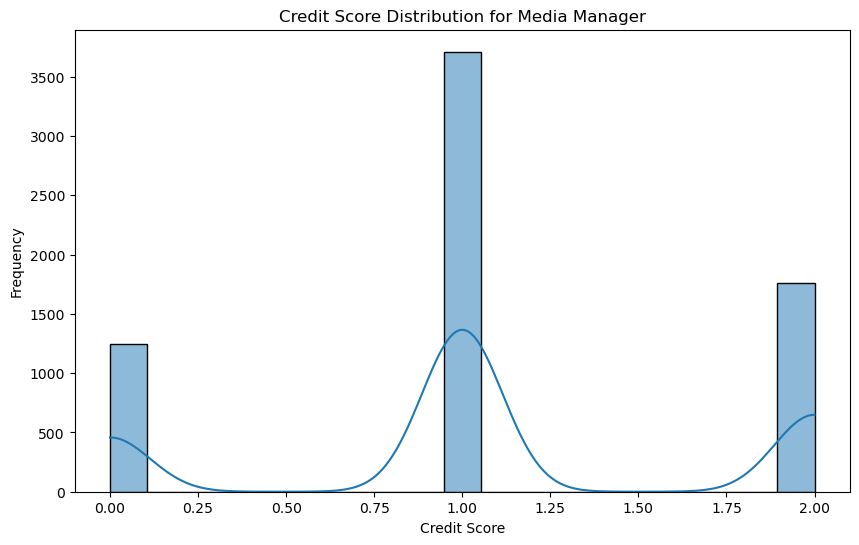

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


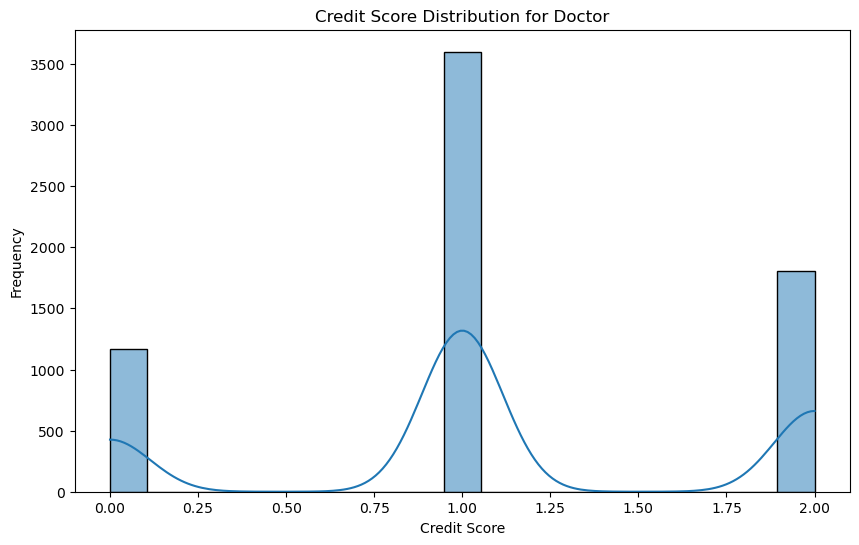

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


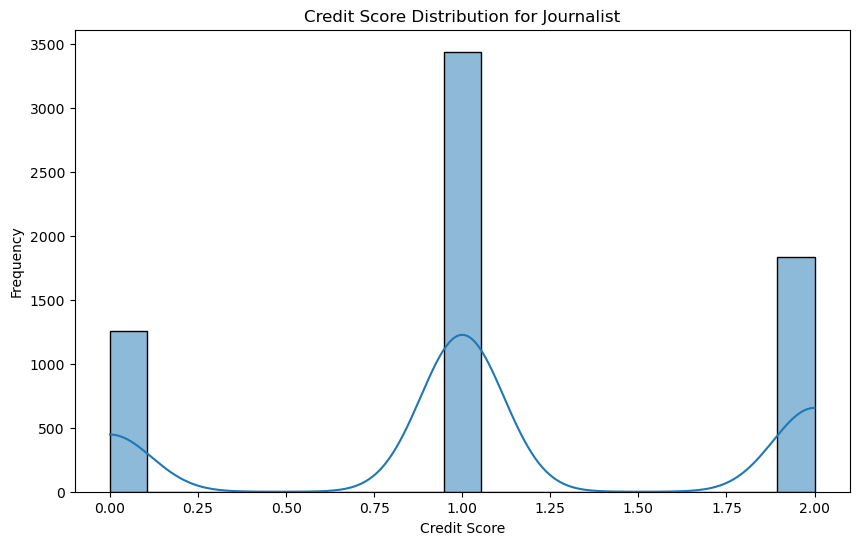

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


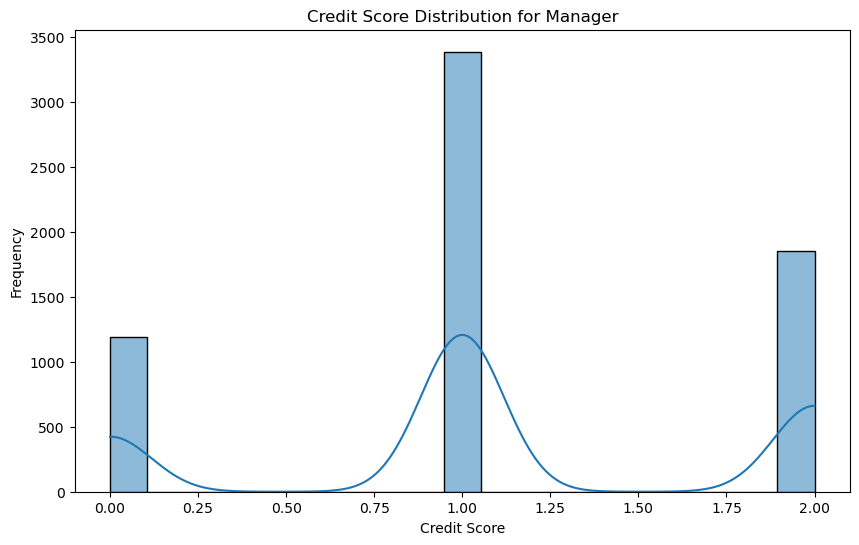

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


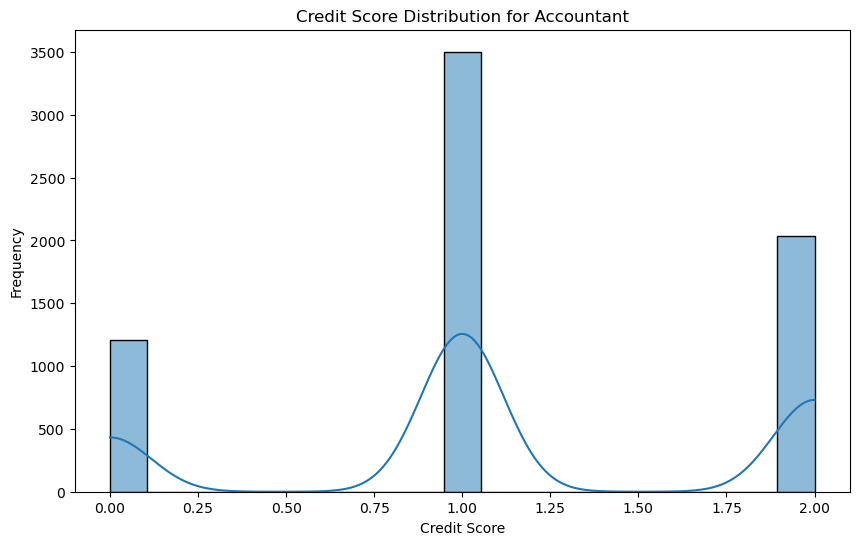

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


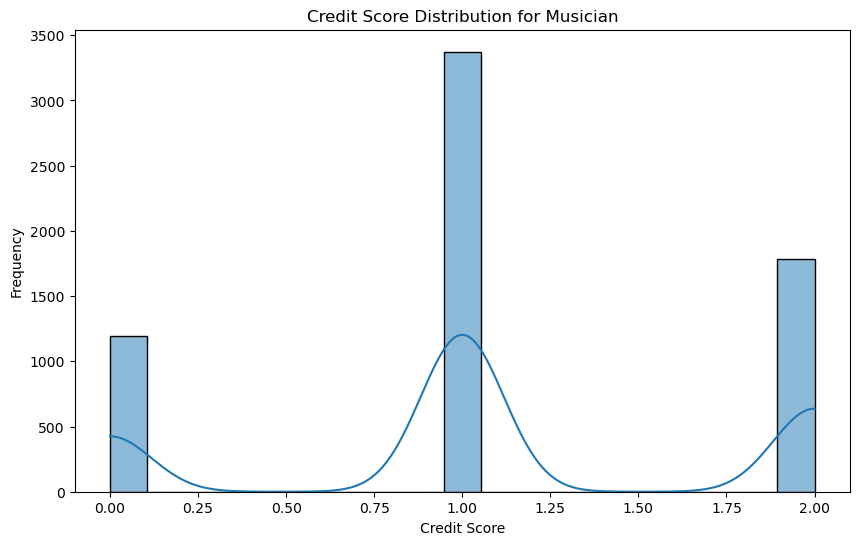

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


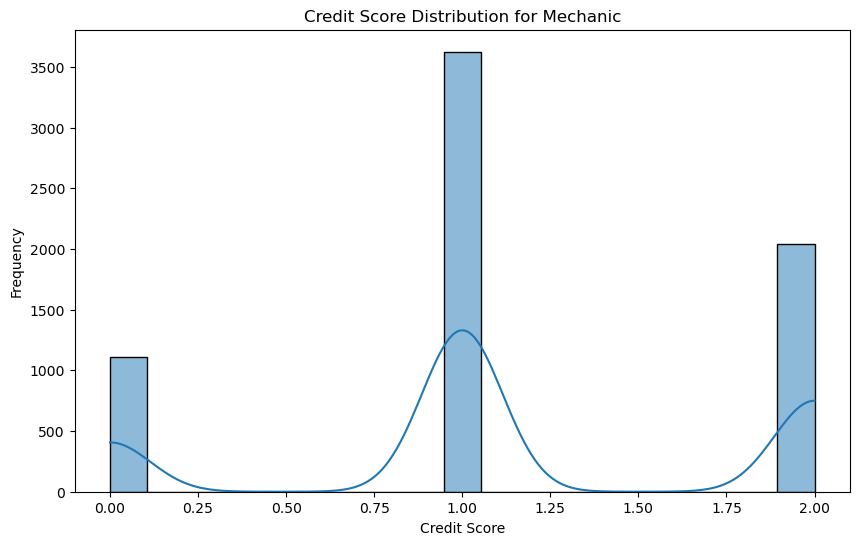

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


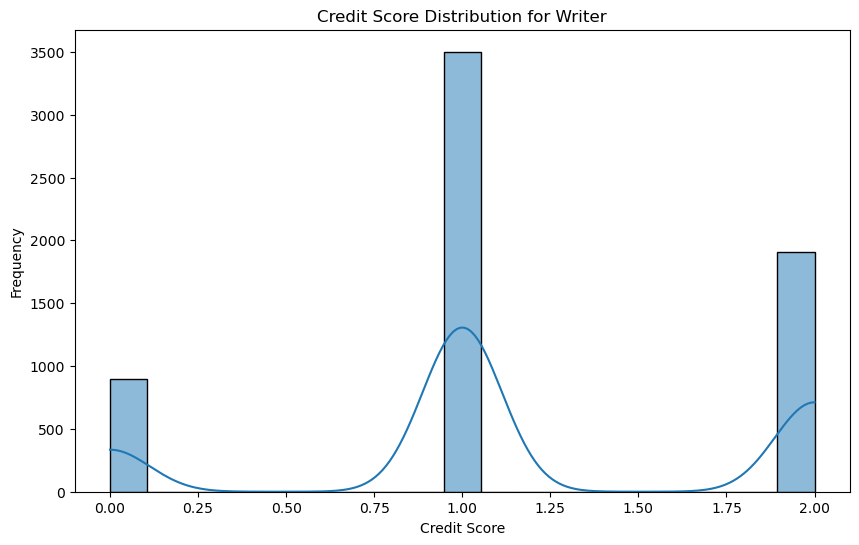

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


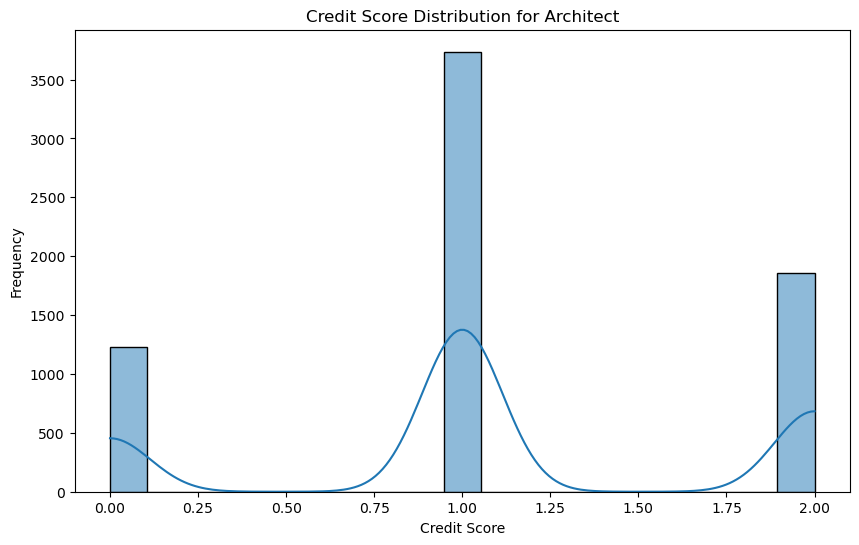

In [26]:
#credit score distribution of each occupation 

occupations = df['Occupation'].unique()

for occupation in occupations:
    # Filtering the DataFrame for the current occupation. Make sure 'Occupation' matches your column name.
    df_filtered = df[df['Occupation'] == occupation]
    
    # Creating a new figure for each occupation
    plt.figure(figsize=(10, 6))
    
    # Creating the plot
    sns.histplot(df_filtered['Credit_Score'], kde=True)
    plt.title(f'Credit Score Distribution for {occupation}')
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.show()

In [27]:
#Categorical variable - Type of Loan

In [28]:
# Step 1: Drop rows where 'Type_of_Loan' is NaN
filtered_dataset = df.dropna(subset=['Type_of_Loan'])

# Step 2: Split 'Type_of_Loan' by ',' and then explode it to have each loan type in a separate row
exploded_loans = filtered_dataset['Type_of_Loan'].str.split(',').explode()

# Step 3: Clean the loan type strings (remove leading ' and ' if present and strip whitespace)
cleaned_loans = exploded_loans.str.lstrip(' and').str.strip()

# Step 4: Count occurrences of each loan type
loan_type_counts = cleaned_loans.value_counts().to_dict()

print(loan_type_counts)

{'Payday Loan': 40568, 'Credit-Builder Loan': 40440, 'Not Specified': 39616, 'Home Equity Loan': 39104, 'Student Loan': 38968, 'Mortgage Loan': 38936, 'Personal Loan': 38888, 'Debt Consolidation Loan': 38776, 'Auto Loan': 37992, 'No Data': 11408}


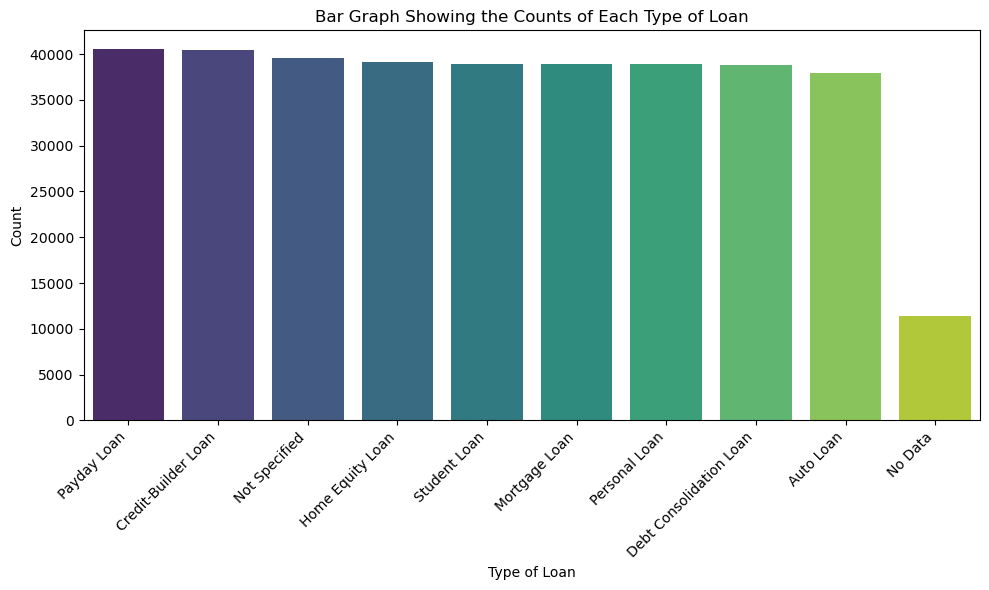

In [29]:
# Convert your loan_type_counts dictionary to a DataFrame
loan_type_df = pd.DataFrame(loan_type_counts.items(), columns=['Type_of_Loan', 'Count'])

# Use seaborn to create the bar plot
plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size for better readability
sns.barplot(x='Type_of_Loan', y='Count', data=loan_type_df, palette='viridis')

# Improve the plot aesthetics and readability
plt.title('Bar Graph Showing the Counts of Each Type of Loan')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.ylabel('Count')
plt.xlabel('Type of Loan')

# Display the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [30]:
#Categorical variable - Credit_MIx

In [31]:
### Value counts of the column - Credit_Mix

credit_mix_count = df['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Credit_Mix
1    45848
0    30384
2    23768
Name: count, dtype: int64

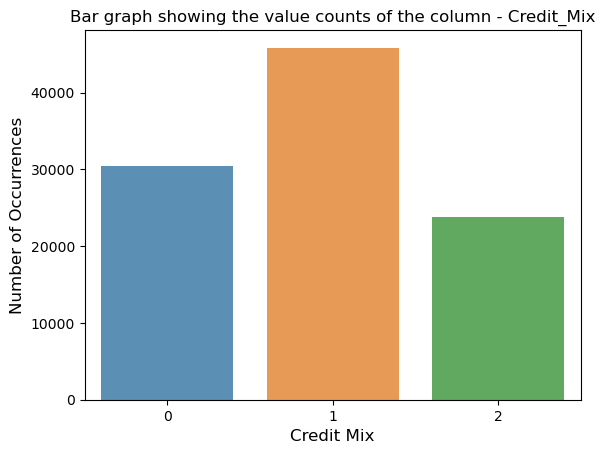

In [32]:
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)

# Setting the title and labels for the plot
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)

# Display the plot
plt.show()

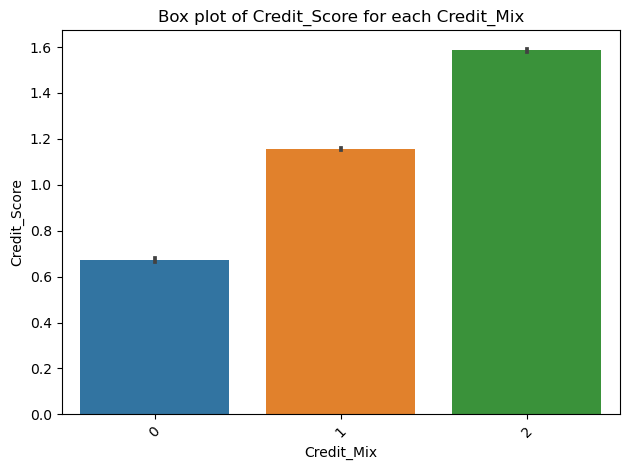

In [33]:
 #Box plot of Credit_Score for each Credit_Mix
sns.barplot(x='Credit_Mix', y='Credit_Score', data=df)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.title('Box plot of Credit_Score for each Credit_Mix')
plt.tight_layout()
plt.show()

From the above graph, we can see that most of the customers have a 'Bad' credit mix.

In [34]:
#Categorical variable - Payment_of_Min_Amount

In [35]:
### Value counts of the column - Payment_of_Min_Amount

min_amount_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [36]:
#Distribution of Payment_of_Min_Amount for each Credit Score Category

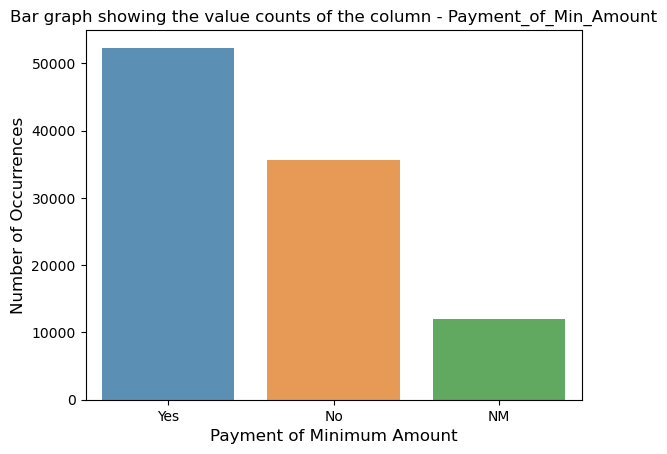

In [37]:
min_amount_count = df['Payment_of_Min_Amount'].value_counts(dropna=False)

# Plotting the bar graph
sns.barplot(x=min_amount_count.index, y=min_amount_count.values, alpha=0.8)

# Setting title and labels
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Payment of Minimum Amount', fontsize=12)

# Displaying the plot
plt.show()

Text(0, 0.5, 'Count')

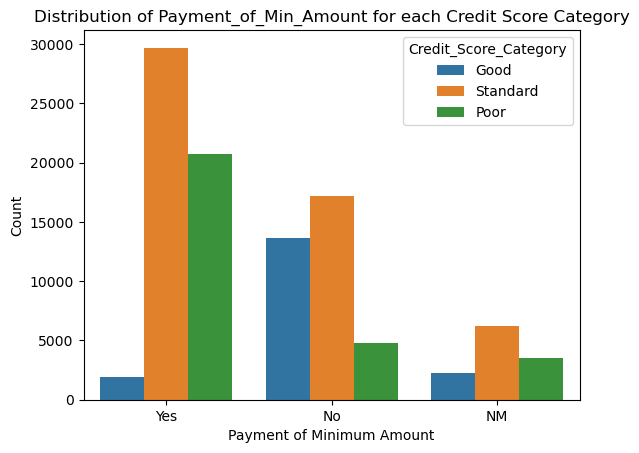

In [38]:
# Define the mapping of numerical values to corresponding categories for Credit_Score
credit_score_mapping = {0: "Good", 1: "Standard", 2: "Poor"}

# Replace numerical values with corresponding categories
df['Credit_Score_Category'] = df['Credit_Score'].map(credit_score_mapping)

# Plotting the count of 'Payment_of_Min_Amount' for each category of 'Credit_Score_Category'
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score_Category', data=df, order=['Yes', 'No', 'NM'])

# Setting the title and labels
plt.title('Distribution of Payment_of_Min_Amount for each Credit Score Category')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')

the bar for "Good: Yes" shows that there are more people in the "Good" credit score category who tend to pay their minimum balance than those who don't.  There are also more people in the "Good" and "Standard" credit score categories who pay their minimum balance compared to those in the "Poor" category.the graph suggests that people with higher credit scores are more likely to pay their minimum balance than those with lower credit scores. This could be because people with higher credit scores are more likely to be financially stable and able to afford their monthly payments. It is also possible that people with higher credit scores are more disciplined about managing their credit card debt.

In [39]:
# Define the mapping of numerical values to corresponding categories for Credit_Score
credit_score_mapping1 = {0: "Good", 1: "Standard", 2: "Poor"}

# Replace numerical values with corresponding categories
df['Credit_Score_Category'] = df['Credit_Score'].map(credit_score_mapping)


In [40]:
df['Credit_Score_Category']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score_Category, Length: 100000, dtype: object

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

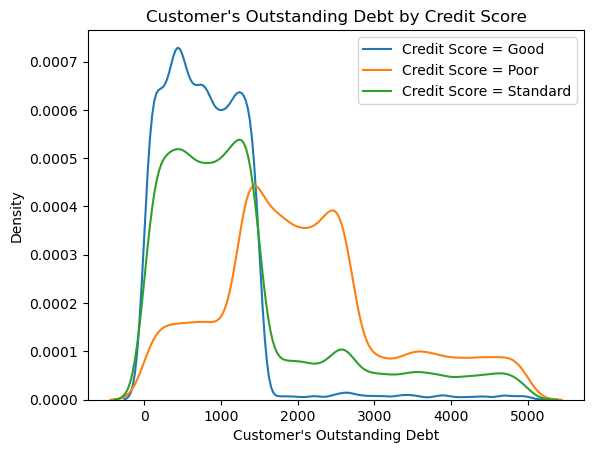

In [41]:
#Customer's Outstanding Debt by Credit Score ploting 
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")


From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amanz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

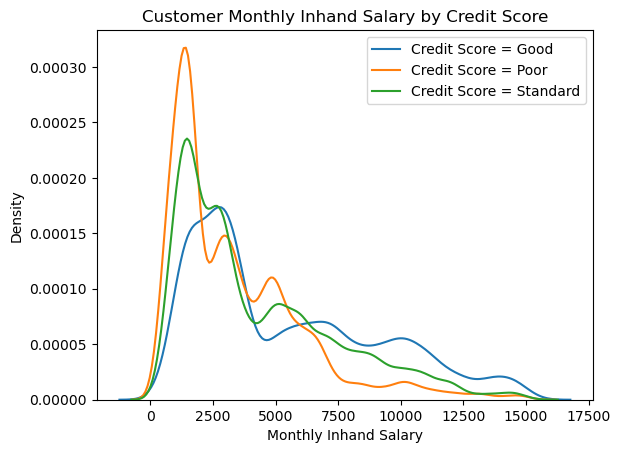

In [42]:
#Customer Monthly Inhand Salary by Credit Score
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')


From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.

In [43]:


df.drop(columns=['Credit_Score_Category'], inplace=True)


Encoding categorical columns

In [44]:
#Encoding-Payment_of_Min_Amount
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an OrdinalEncoder object with specified category order
payment_of_min_amount_encoder = OrdinalEncoder(categories=[['NM','No','Yes']])

# Apply the encoder to 'Payment_of_Min_Amount' column in DataFrame df
encoded_payment_of_min_amount = payment_of_min_amount_encoder.fit_transform(df[['Payment_of_Min_Amount']])




In [45]:
# Store the encoded values back into the DataFrame
df['Payment_of_Min_Amount'] = encoded_payment_of_min_amount

In [46]:
df['Payment_of_Min_Amount']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: Payment_of_Min_Amount, Length: 100000, dtype: float64

In [47]:
object_columns = df.select_dtypes(include=['object']).columns

num_object_columns = len(object_columns)
print("Number of columns with data type 'object':", num_object_columns)
print("Column names with data type 'object':", object_columns)

Number of columns with data type 'object': 3
Column names with data type 'object': Index(['Name', 'Occupation', 'Type_of_Loan'], dtype='object')


In [48]:
#encoding occupation column 
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'Occupation' column
encoded_occupation = encoder.fit_transform(df[['Occupation']])

# Update the DataFrame with encoded values
df['Occupation'] = encoded_occupation




In [49]:

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Salary_Range
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,26.822620,265.0,1.0,49.574949,21.46538,0,312.494089,0,1
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,31.944960,266.0,1.0,49.574949,21.46538,3,284.629162,0,1
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,28.609352,267.0,1.0,49.574949,21.46538,5,331.209863,0,1
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,31.377862,268.0,1.0,49.574949,21.46538,1,223.451310,0,1
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,24.797347,269.0,1.0,49.574949,21.46538,4,341.489231,0,1


In [50]:
#Encoding Type of loan column

In [51]:
counts = df.Type_of_Loan.value_counts()
counts


Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
loan_encoder = LabelEncoder()

# Fit and transform the 'Type_of_Loan' column
encoded_loans = loan_encoder.fit_transform(df['Type_of_Loan'])

# Update the DataFrame with encoded values
df['Type_of_Loan'] = encoded_loans


In [53]:
df['Type_of_Loan'] 

0        128
1        128
2        128
3        128
4        128
        ... 
99995    683
99996    683
99997    683
99998    683
99999    683
Name: Type_of_Loan, Length: 100000, dtype: int32

In [54]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Salary_Range
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,26.822620,265.0,1.0,49.574949,21.46538,0,312.494089,0,1
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,31.944960,266.0,1.0,49.574949,21.46538,3,284.629162,0,1
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,28.609352,267.0,1.0,49.574949,21.46538,5,331.209863,0,1
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,31.377862,268.0,1.0,49.574949,21.46538,1,223.451310,0,1
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,12.0,19114.12,1824.843333,3.0,...,809.98,24.797347,269.0,1.0,49.574949,21.46538,4,341.489231,0,1


In [55]:


# List of columns to drop
columns_to_drop = ['ID', 'Name','Salary_Range']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   SSN                       100000 non-null  float64
 4   Occupation                100000 non-null  float64
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  float64
 8   Num_Credit_Card           100000 non-null  float64
 9   Interest_Rate             100000 non-null  float64
 10  Num_of_Loan               100000 non-null  float64
 11  Type_of_Loan              100000 non-null  int32  
 12  Delay_from_due_date       100000 non-null  float64
 13  Num_of_Delayed_Payment    100000 non-null  fl

## Model Training -Random Forest 

In [57]:
#Random Forest with specific columns 

In [58]:

x = df[['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix', 'Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount','Total_EMI_per_month', 'Payment_Behaviour']]
y = df['Credit_Score']


In [59]:
from sklearn.model_selection import train_test_split #splitting the dataframe 


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42) 


In [60]:
from sklearn.preprocessing import StandardScaler#scaling the data

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Random Forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# Predictions on the testing set
y_pred = clf.predict(x_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8042666666666667


In [100]:
from sklearn.metrics import confusion_matrix, classification_report

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 3992  1297    33]
 [ 1108 12940  1825]
 [   70  1539  7196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5322
           1       0.82      0.82      0.82     15873
           2       0.79      0.82      0.81      8805

    accuracy                           0.80     30000
   macro avg       0.80      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



Training the model with all columns 

In [63]:
x1 = df.drop("Credit_Score", axis=1)
y1 = df['Credit_Score']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42) 

In [64]:
#scaling the data

scaler=StandardScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.fit_transform(x1_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x1_train, y1_train)

RandomForestClassifier(random_state=42)

In [66]:
# Predictions on the testing set
y1_pred = clf.predict(x1_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.8288


In [67]:
# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(conf_matrix1)

# Generate and print classification report
class_report1 = classification_report(y1_test, y1_pred)
print("Classification Report:")
print(class_report1)

Confusion Matrix:
[[ 4251  1046    25]
 [ 1016 13148  1709]
 [   45  1295  7465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5322
           1       0.85      0.83      0.84     15873
           2       0.81      0.85      0.83      8805

    accuracy                           0.83     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.83      0.83      0.83     30000



Here we use the Random Forest Algorithm in two cases 
1. on specific columns -accuracy is 80.42%   
2.include all features -accuracy is 82.88%

## Performing Random Oversampling and Training the model with Random Forest Classification Algorithm 

Random Oversampling on all features

In [68]:


from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y2 = df["Credit_Score"]
X2 = df.drop("Credit_Score", axis=1)
X2, y2 = sampler.fit_resample(X2, y2)

df1 = pd.concat([pd.DataFrame(X2), pd.DataFrame(y2)], axis=1)

In [69]:

X2 = df1.drop("Credit_Score", axis=1)
y2 = df1["Credit_Score"]



In [70]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42) #splitting the data 

In [71]:
from sklearn.preprocessing import StandardScaler#scaling the data 

scaler=StandardScaler()
x2_train=scaler.fit_transform(x2_train)
x2_test=scaler.fit_transform(x2_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x2_train, y2_train)

RandomForestClassifier(random_state=42)

In [73]:
# Predictions on the testing set
y2_pred = clf.predict(x2_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.9147669097519694


In [74]:
# Calculate confusion matrix
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(conf_matrix2)

# Generate and print classification report
class_report2 = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report2)

Confusion Matrix:
[[15748   201     2]
 [ 1307 12697  1948]
 [   35   586 15333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5322
           1       0.82      0.82      0.82     15873
           2       0.79      0.82      0.81      8805

    accuracy                           0.80     30000
   macro avg       0.80      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



Case 2 : Random Oversampling on specific columns 

In [75]:
X3 = df[['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix', 'Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount','Total_EMI_per_month', 'Payment_Behaviour']]
y3 = df['Credit_Score']
X3, y3 = sampler.fit_resample(X3, y3)

df2 = pd.concat([pd.DataFrame(X3), pd.DataFrame(y3)], axis=1)




In [76]:
X3 = df2[['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix', 'Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount','Total_EMI_per_month', 'Payment_Behaviour']]
y3 = df2["Credit_Score"]


In [77]:
x3_train,x3_test,y3_train,y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42) 

In [78]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x3_train=scaler.fit_transform(x3_train)
x3_test=scaler.fit_transform(x3_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x3_train, y3_train)

RandomForestClassifier(random_state=42)

In [80]:
# Predictions on the testing set
y3_pred = clf.predict(x3_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy3)

Accuracy: 0.9020623942161021


In [81]:
# Calculate confusion matrix
conf_matrix3= confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(conf_matrix3)

# Generate and print classification report
class_report3 = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report3)

Confusion Matrix:
[[15748   201     2]
 [ 1307 12697  1948]
 [   35   586 15333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5322
           1       0.82      0.82      0.82     15873
           2       0.79      0.82      0.81      8805

    accuracy                           0.80     30000
   macro avg       0.80      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



 I initially conducted Random oversampling to address class imbalance, followed by classification algorithm training. The model yielded a training accuracy of 91.65% when using all features, and 90.35% when utilizing specific features.



## 2.Model Training -Decision Tree

In [82]:
#Decision Tree with Specific features 

In [83]:
x_dec = df[['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix', 'Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount','Total_EMI_per_month', 'Payment_Behaviour']]
y_dec = df['Credit_Score']


In [84]:
x_train_dec,x_test_dec,y_train_dec,y_test_dec = train_test_split(x_dec, y_dec, test_size=0.3, random_state=42)
scaler=StandardScaler()
x_train_dec=scaler.fit_transform(x_train_dec)
x_test_dec=scaler.fit_transform(x_test_dec)




In [85]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf1 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(x_train_dec, y_train_dec)


DecisionTreeClassifier(random_state=42)

In [86]:
# Predictions on the testing set
y_pred_dec = clf1.predict(x_test_dec)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_dec = accuracy_score(y_test_dec, y_pred_dec)
print("Accuracy:", accuracy_dec)



Accuracy: 0.7116333333333333


In [87]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix_dec = confusion_matrix(y_test_dec, y_pred_dec)
print("Confusion Matrix:")
print(conf_matrix_dec)

# Generate and print classification report
class_report_dec = classification_report(y_test_dec, y_pred_dec)
print("Classification Report:")
print(class_report_dec)

Confusion Matrix:
[[ 3447  1652   223]
 [ 1732 11832  2309]
 [  230  2505  6070]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      5322
           1       0.74      0.75      0.74     15873
           2       0.71      0.69      0.70      8805

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



In [88]:
#Decision Tree with all features 

In [89]:
x_dec1 = df.drop("Credit_Score", axis=1)
y_dec1 = df['Credit_Score']


In [90]:
x_train_dec1,x_test_dec1,y_train_dec1,y_test_dec1 = train_test_split(x_dec1, y_dec1, test_size=0.3, random_state=42)
scaler=StandardScaler()
x_train_dec1=scaler.fit_transform(x_train_dec1)
x_test_dec1=scaler.fit_transform(x_test_dec1)




In [91]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf1 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(x_train_dec1, y_train_dec1)


DecisionTreeClassifier(random_state=42)

In [92]:
# Predictions on the testing set
y_pred_dec1 = clf1.predict(x_test_dec1)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_dec1 = accuracy_score(y_test_dec1, y_pred_dec1)
print("Accuracy:", accuracy_dec1)



Accuracy: 0.7419


In [93]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix_dec1 = confusion_matrix(y_test_dec, y_pred_dec1)
print("Confusion Matrix:")
print(conf_matrix_dec1)

# Generate and print classification report
class_report_dec1 = classification_report(y_test_dec, y_pred_dec1)
print("Classification Report:")
print(class_report_dec1)

Confusion Matrix:
[[ 3654  1475   193]
 [ 1445 12292  2136]
 [  227  2267  6311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5322
           1       0.77      0.77      0.77     15873
           2       0.73      0.72      0.72      8805

    accuracy                           0.74     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.74      0.74      0.74     30000



## Performing Random Oversampling and Training the model with Decision  Classification Algorithm

In [94]:
# Decision TRee Classifier on all features 

In [95]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y2_dec = df["Credit_Score"]
X2_dec = df.drop("Credit_Score", axis=1)
X2_dec, y2_dec = sampler.fit_resample(X2_dec, y2_dec)

df1_dec = pd.concat([pd.DataFrame(X2_dec), pd.DataFrame(y2_dec)], axis=1)


In [96]:
X2_dec = df1_dec.drop("Credit_Score", axis=1)
y2_dec = df1_dec["Credit_Score"]
x2_train_dec,x2_test_dec,y2_train_dec,y2_test_dec = train_test_split(X2_dec, y2_dec, test_size=0.3, random_state=42) #splitting the data 
 



In [97]:
from sklearn.preprocessing import StandardScaler#scaling the data
scaler=StandardScaler()
x2_train_dec=scaler.fit_transform(x2_train_dec)
x2_test_dec=scaler.fit_transform(x2_test_dec)



In [98]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf_dec = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dec.fit(x2_train_dec, y2_train_dec)



DecisionTreeClassifier(random_state=42)

In [99]:
# Predictions on the testing set
y2_pred_dec = clf_dec.predict(x2_test_dec)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_dec2 = accuracy_score(y2_test_dec, y2_pred_dec)
print("Accuracy:", accuracy_dec2)

# Calculate confusion matrix
conf_matrix_dec2 = confusion_matrix(y2_test_dec, y2_pred_dec)
print("Confusion Matrix:")
print(conf_matrix_dec2)

# Generate and print classification report
class_report_dec2 = classification_report(y2_test_dec, y2_pred_dec)
print("Classification Report:")
print(class_report_dec2)

Accuracy: 0.8477547694172222
Confusion Matrix:
[[14721  1083   147]
 [ 1589 11968  2395]
 [  215  1857 13882]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     15951
           1       0.80      0.75      0.78     15952
           2       0.85      0.87      0.86     15954

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



Upon comparing the model accuracies, it became evident that Random Forest consistently yielded higher accuracy after oversampling.